In [580]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing 
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_percentage_error, mean_squared_error, roc_auc_score, auc, log_loss, precision_recall_fscore_support, mean_absolute_error
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler

from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")

In [581]:
churn_data  =pd.read_csv("EDA_final.csv")
churn_data.drop(["Unnamed: 0"],axis=1,inplace=True)
churn_data

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,Churn
0,16,1,128,1,25,0,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,0
1,35,1,107,1,26,0,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,0
2,31,1,137,0,0,0,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,0
3,35,0,84,0,0,1,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,0
4,36,1,75,0,0,1,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4964,11,0,50,1,40,0,9.9,5,2.67,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,2,0
4965,49,1,152,0,0,0,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,1
4966,7,1,61,0,0,0,13.6,4,3.67,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,1,0
4967,7,2,109,0,0,0,8.5,6,2.30,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,0,0


In [582]:
churn_data['total.charges'] = churn_data.apply(lambda x: x['day.charge'] + x['eve.charge'] + x['night.charge'] + x["intl.charge"], axis=1)
churn_data['total.calls'] = churn_data.apply(lambda x: x['day.calls'] + x['eve.calls'] + x['night.calls'] + x["intl.calls"], axis=1)
churn_data['total.mins'] = churn_data.apply(lambda x: x['day.mins'] + x['eve.mins'] + x['night.mins'] + x["intl.mins"], axis=1)

churn_data.drop(["day.charge",'eve.charge','night.charge',"intl.charge","state","area.code"],axis=1,inplace=True)
churn_data.drop(["day.calls",'eve.calls','eve.calls',"intl.calls","night.calls"],axis=1,inplace=True)
churn_data.drop(["day.mins",'eve.mins','eve.mins',"intl.mins","night.mins"],axis=1,inplace=True)

churn_data

,account.length,voice.plan,voice.messages,intl.plan,customer.calls,Churn,total.charges,total.calls,total.mins
0,128,1,25,0,1,0,75.56,303.0,717.2
1,107,1,26,0,1,0,59.24,332.0,625.2
2,137,0,0,0,0,0,62.29,333.0,539.4
3,84,0,0,1,2,0,66.80,255.0,564.8
4,75,0,0,1,3,0,52.09,359.0,512.0
...,...,...,...,...,...,...,...,...,...
4964,50,1,40,0,2,0,75.09,374.0,766.1
4965,152,0,0,0,3,1,66.72,278.0,669.3
4966,61,0,0,0,1,0,51.82,318.0,539.4
4967,109,0,0,0,0,0,59.09,254.0,593.4


### Splitting the Data

In [583]:
X = churn_data.drop("Churn",axis=1)
y = churn_data[["Churn"]]

### Scaling Down the Data

In [585]:
scaler = MinMaxScaler()
scaled_churn_data = scaler.fit_transform(X)
scaled_X = pd.DataFrame(scaled_churn_data,columns=X_train.columns)

In [586]:
scaled_X

,account.length,voice.plan,voice.messages,intl.plan,customer.calls,total.charges,total.calls,total.mins
0,0.524793,1.0,0.480769,0.0,0.111111,0.718793,0.497778,0.720659
1,0.438017,1.0,0.500000,0.0,0.111111,0.495903,0.626667,0.567505
2,0.561983,0.0,0.000000,0.0,0.000000,0.537558,0.631111,0.424671
3,0.342975,0.0,0.000000,1.0,0.222222,0.599153,0.284444,0.466955
4,0.305785,0.0,0.000000,1.0,0.333333,0.398252,0.746667,0.379058
...,...,...,...,...,...,...,...,...
4964,0.202479,1.0,0.769231,0.0,0.222222,0.712374,0.813333,0.802064
4965,0.623967,0.0,0.000000,0.0,0.333333,0.598061,0.386667,0.640919
4966,0.247934,0.0,0.000000,0.0,0.111111,0.394564,0.564444,0.424671
4967,0.446281,0.0,0.000000,0.0,0.000000,0.493854,0.280000,0.514566


### Balancing the Dataset

In [587]:
y.value_counts()

Churn
0        4264
1         705
dtype: int64

In [589]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy="minority")
smote_X,smote_y = smote.fit_resample(scaled_X,y)
smote_y.value_counts()

Churn
0        4264
1        4264
dtype: int64

In [224]:
#from imblearn.over_sampling import SMOTE
#smote = SMOTE(sampling_strategy="minority")
#X_sm,y_sm = smote.fit_resample(X,y)
#y_sm.value_counts()

Dataset was highly imbalanced so we balanced the data

In [590]:
smote_X.shape

(8528, 8)

In [591]:
smote_X

,account.length,voice.plan,voice.messages,intl.plan,customer.calls,total.charges,total.calls,total.mins
0,0.524793,1.0,0.480769,0.0,0.111111,0.718793,0.497778,0.720659
1,0.438017,1.0,0.500000,0.0,0.111111,0.495903,0.626667,0.567505
2,0.561983,0.0,0.000000,0.0,0.000000,0.537558,0.631111,0.424671
3,0.342975,0.0,0.000000,1.0,0.222222,0.599153,0.284444,0.466955
4,0.305785,0.0,0.000000,1.0,0.333333,0.398252,0.746667,0.379058
...,...,...,...,...,...,...,...,...
8523,0.249573,0.0,0.000000,1.0,0.000000,0.415087,0.363551,0.350239
8524,0.315155,0.0,0.000000,0.0,0.000000,0.758059,0.581096,0.763852
8525,0.411975,0.0,0.000000,1.0,0.462533,0.691682,0.597209,0.702158
8526,0.174348,0.0,0.000000,0.0,0.333333,0.804019,0.457603,0.794571


In [592]:
smote_y.shape

(8528, 1)

In [522]:
X_train,X_test,y_train,y_test=train_test_split(smote_X,smote_y,test_size=0.20,random_state=123)

In [523]:
X_test

,account.length,voice.plan,voice.messages,intl.plan,customer.calls,total.charges,total.calls,total.mins
598,90,0,0,0,1,62.930000,225.000000,659.600000
2173,121,0,0,0,1,52.480000,287.000000,522.300000
4607,67,0,0,0,1,38.740000,299.000000,408.400000
1126,95,1,32,0,0,70.210000,267.000000,632.300000
426,100,0,0,0,0,74.400000,280.000000,682.500000
...,...,...,...,...,...,...,...,...
4458,143,0,0,0,1,71.450000,282.000000,579.100000
2631,101,0,0,0,0,68.000000,315.000000,564.500000
5244,129,0,0,0,0,59.334001,330.556396,531.066919
629,49,0,0,0,0,73.880000,307.000000,734.300000


In [524]:
y_test

,Churn
598,0
2173,0
4607,0
1126,0
426,1
...,...
4458,0
2631,0
5244,1
629,0


## Feature Selection 

### CHI 2

In [476]:
from sklearn.feature_selection import SelectKBest,mutual_info_classif
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2,k=6)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcloumns = pd.DataFrame(X.columns)
feature_scores = pd.concat([dfcloumns,dfscores],axis=1)
feature_scores.columns=["specs","score"]
feature_scores.sort_values(by="score")

,specs,score
6,total.calls,0.025852
0,account.length,35.465453
1,voice.plan,45.736898
4,customer.calls,246.103231
3,intl.plan,305.958303
5,total.charges,496.761705
2,voice.messages,1142.512819
7,total.mins,2778.333031


### Mutual information score

In [479]:
mi_score = SelectKBest(score_func=mutual_info_classif,k= 6)
fit = mi_score.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcloumns = pd.DataFrame(X.columns)
feature_scores = pd.concat([dfcloumns,dfscores],axis=1)
feature_scores.columns=["specs","score"]
feature_scores.sort_values(by="score",ascending=False)

,specs,score
5,total.charges,0.106863
7,total.mins,0.044326
4,customer.calls,0.036527
3,intl.plan,0.027901
2,voice.messages,0.005958
1,voice.plan,0.004185
0,account.length,0.003898
6,total.calls,0.003092


In [388]:
smote_X

,account.length,voice.plan,voice.messages,intl.plan,customer.calls,total.charges,total.calls,total.mins
0,128,1,25,0,1,75.560000,303.000000,717.200000
1,107,1,26,0,1,59.240000,332.000000,625.200000
2,137,0,0,0,0,62.290000,333.000000,539.400000
3,84,0,0,1,2,66.800000,255.000000,564.800000
4,75,0,0,1,3,52.090000,359.000000,512.000000
...,...,...,...,...,...,...,...,...
8523,119,0,0,0,1,78.505441,316.248037,673.675196
8524,90,0,0,0,1,64.375815,334.311932,683.523805
8525,123,0,0,0,3,55.997658,325.672656,515.833633
8526,129,0,0,0,4,77.889598,316.685498,723.762085


###  Extra tree classifier

In [480]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [481]:
etc_model= ExtraTreesClassifier()
etc_model.fit(X,y)
print(etc_model.feature_importances_)

[0.10039161 0.02493092 0.02946385 0.07071618 0.1639358  0.33685308
 0.09653876 0.17716979]


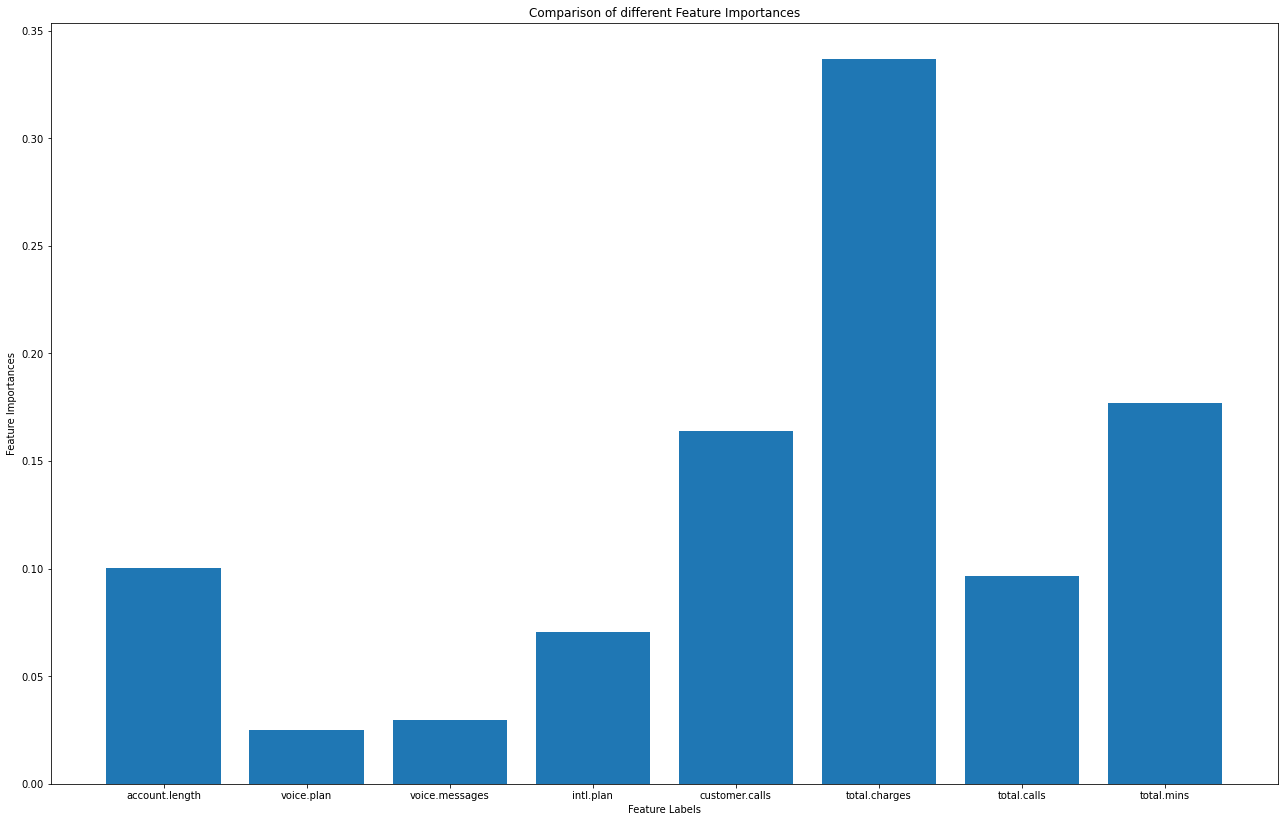

In [482]:

# Plotting a Bar Graph to compare the models
plt.figure(figsize=(22,14))
plt.bar(X.columns,etc_model.feature_importances_ )
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

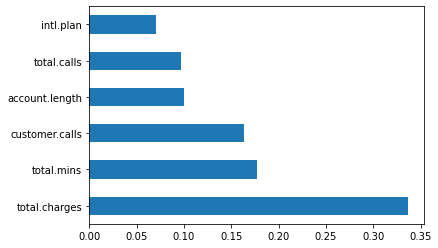

In [483]:
Feature = pd.Series(etc_model.feature_importances_, index = X.columns)
Feature.nlargest(6).plot(kind = 'barh')
plt.show()

### Modeling

In [593]:
X_train, X_test, y_train, y_test = train_test_split(smote_X,smote_y,test_size=0.20,random_state=12)

In [594]:
model_logistic = LogisticRegression()
model_logistic.fit(X_train,y_train)

LogisticRegression()

In [595]:
y_pred = model_logistic.predict(X_test)

In [596]:
acc1 = accuracy_score(y_test,y_pred)
print('Classification Report : \n',classification_report(y_test,y_pred))
print('='*50)
print('Accuracy =',acc1)
print('='*50)

Classification Report : 
               precision    recall  f1-score   support

           0       0.79      0.78      0.79       861
           1       0.78      0.79      0.78       845

    accuracy                           0.79      1706
   macro avg       0.79      0.79      0.79      1706
weighted avg       0.79      0.79      0.79      1706

Accuracy = 0.7854630715123095


<h2><center> 2.SUPPORT VECTOR CLASSIFIER</center></h2>

In [531]:
clf = SVC()

kernel: 'poly'
parameters ={'kernel':['rbf'],
              'gamma':[100, 50, 5, 0.5, 0.1, 0.01, 0.0001, 'auto'],
               'C':[50, 15, 10, 6, 5, 0.1, 0.001, 0.0001]}

gsv = GridSearchCV(clf, param_grid = parameters, cv=10)

gsv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [50, 15, 10, 6, 5, 0.1, 0.001, 0.0001],
                         'gamma': [100, 50, 5, 0.5, 0.1, 0.01, 0.0001, 'auto'],
                         'kernel': ['rbf']})

In [631]:
gsv.best_params_

{'C': 15, 'gamma': 50, 'kernel': 'rbf'}

In [533]:
gsv.best_score_

0.9038365757418323

In [632]:
svc_model = SVC(C = 15, gamma =50, kernel='rbf')
svc_model.fit(scaled_X_train , y_train)

SVC(C=15, gamma=50)

In [633]:
y_pred_svc = svc_model.predict(scaled_X_test)

In [634]:
acc2 = accuracy_score(y_test,y_pred_svc)
print('Classification Report : \n',classification_report(y_test,y_pred_svc))
print('='*50)
print('Accuracy =',acc2)
print('='*50)

Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       823
           1       0.90      0.90      0.90       883

    accuracy                           0.90      1706
   macro avg       0.90      0.90      0.90      1706
weighted avg       0.90      0.90      0.90      1706

Accuracy = 0.8968347010550997


In [245]:
acc2 = accuracy_score(y_test,y_pred_svc)
print('Classification Report : \n',classification_report(y_test,y_pred_svc))
print('='*50)
print('Accuracy =',acc2)
print('='*50)

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.96      0.93      0.94       861
         1.0       0.93      0.96      0.94       845

    accuracy                           0.94      1706
   macro avg       0.94      0.94      0.94      1706
weighted avg       0.94      0.94      0.94      1706

Accuracy = 0.9413833528722158


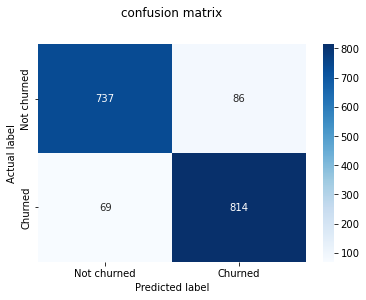

In [402]:
cm = confusion_matrix(y_test,y_pred_svc)
class_label = ["Not churned", "Churned"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='Blues')
plt.title('Confusion matrix for logistic regression ', fontsize = 20);
plt.title("confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.show()

In [403]:
svc_model.score(X_train,y_train)

0.9982409850483729

In [404]:
svc_model.score(X_test,y_test)

0.9091441969519344

<h2><center>3. Decision Tree</center></h2>

In [506]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=124)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(scaled_X_train,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=124),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [507]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=8,
                       max_features='log2', random_state=124)

In [508]:
dt_model = DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=8, max_features='log2', random_state=124)
dt_model.fit(scaled_X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=8,
                       max_features='log2', random_state=124)

In [509]:
#Predicting on test data
y_pred_dt = dt_model.predict(scaled_X_test) # predicting on test data set 

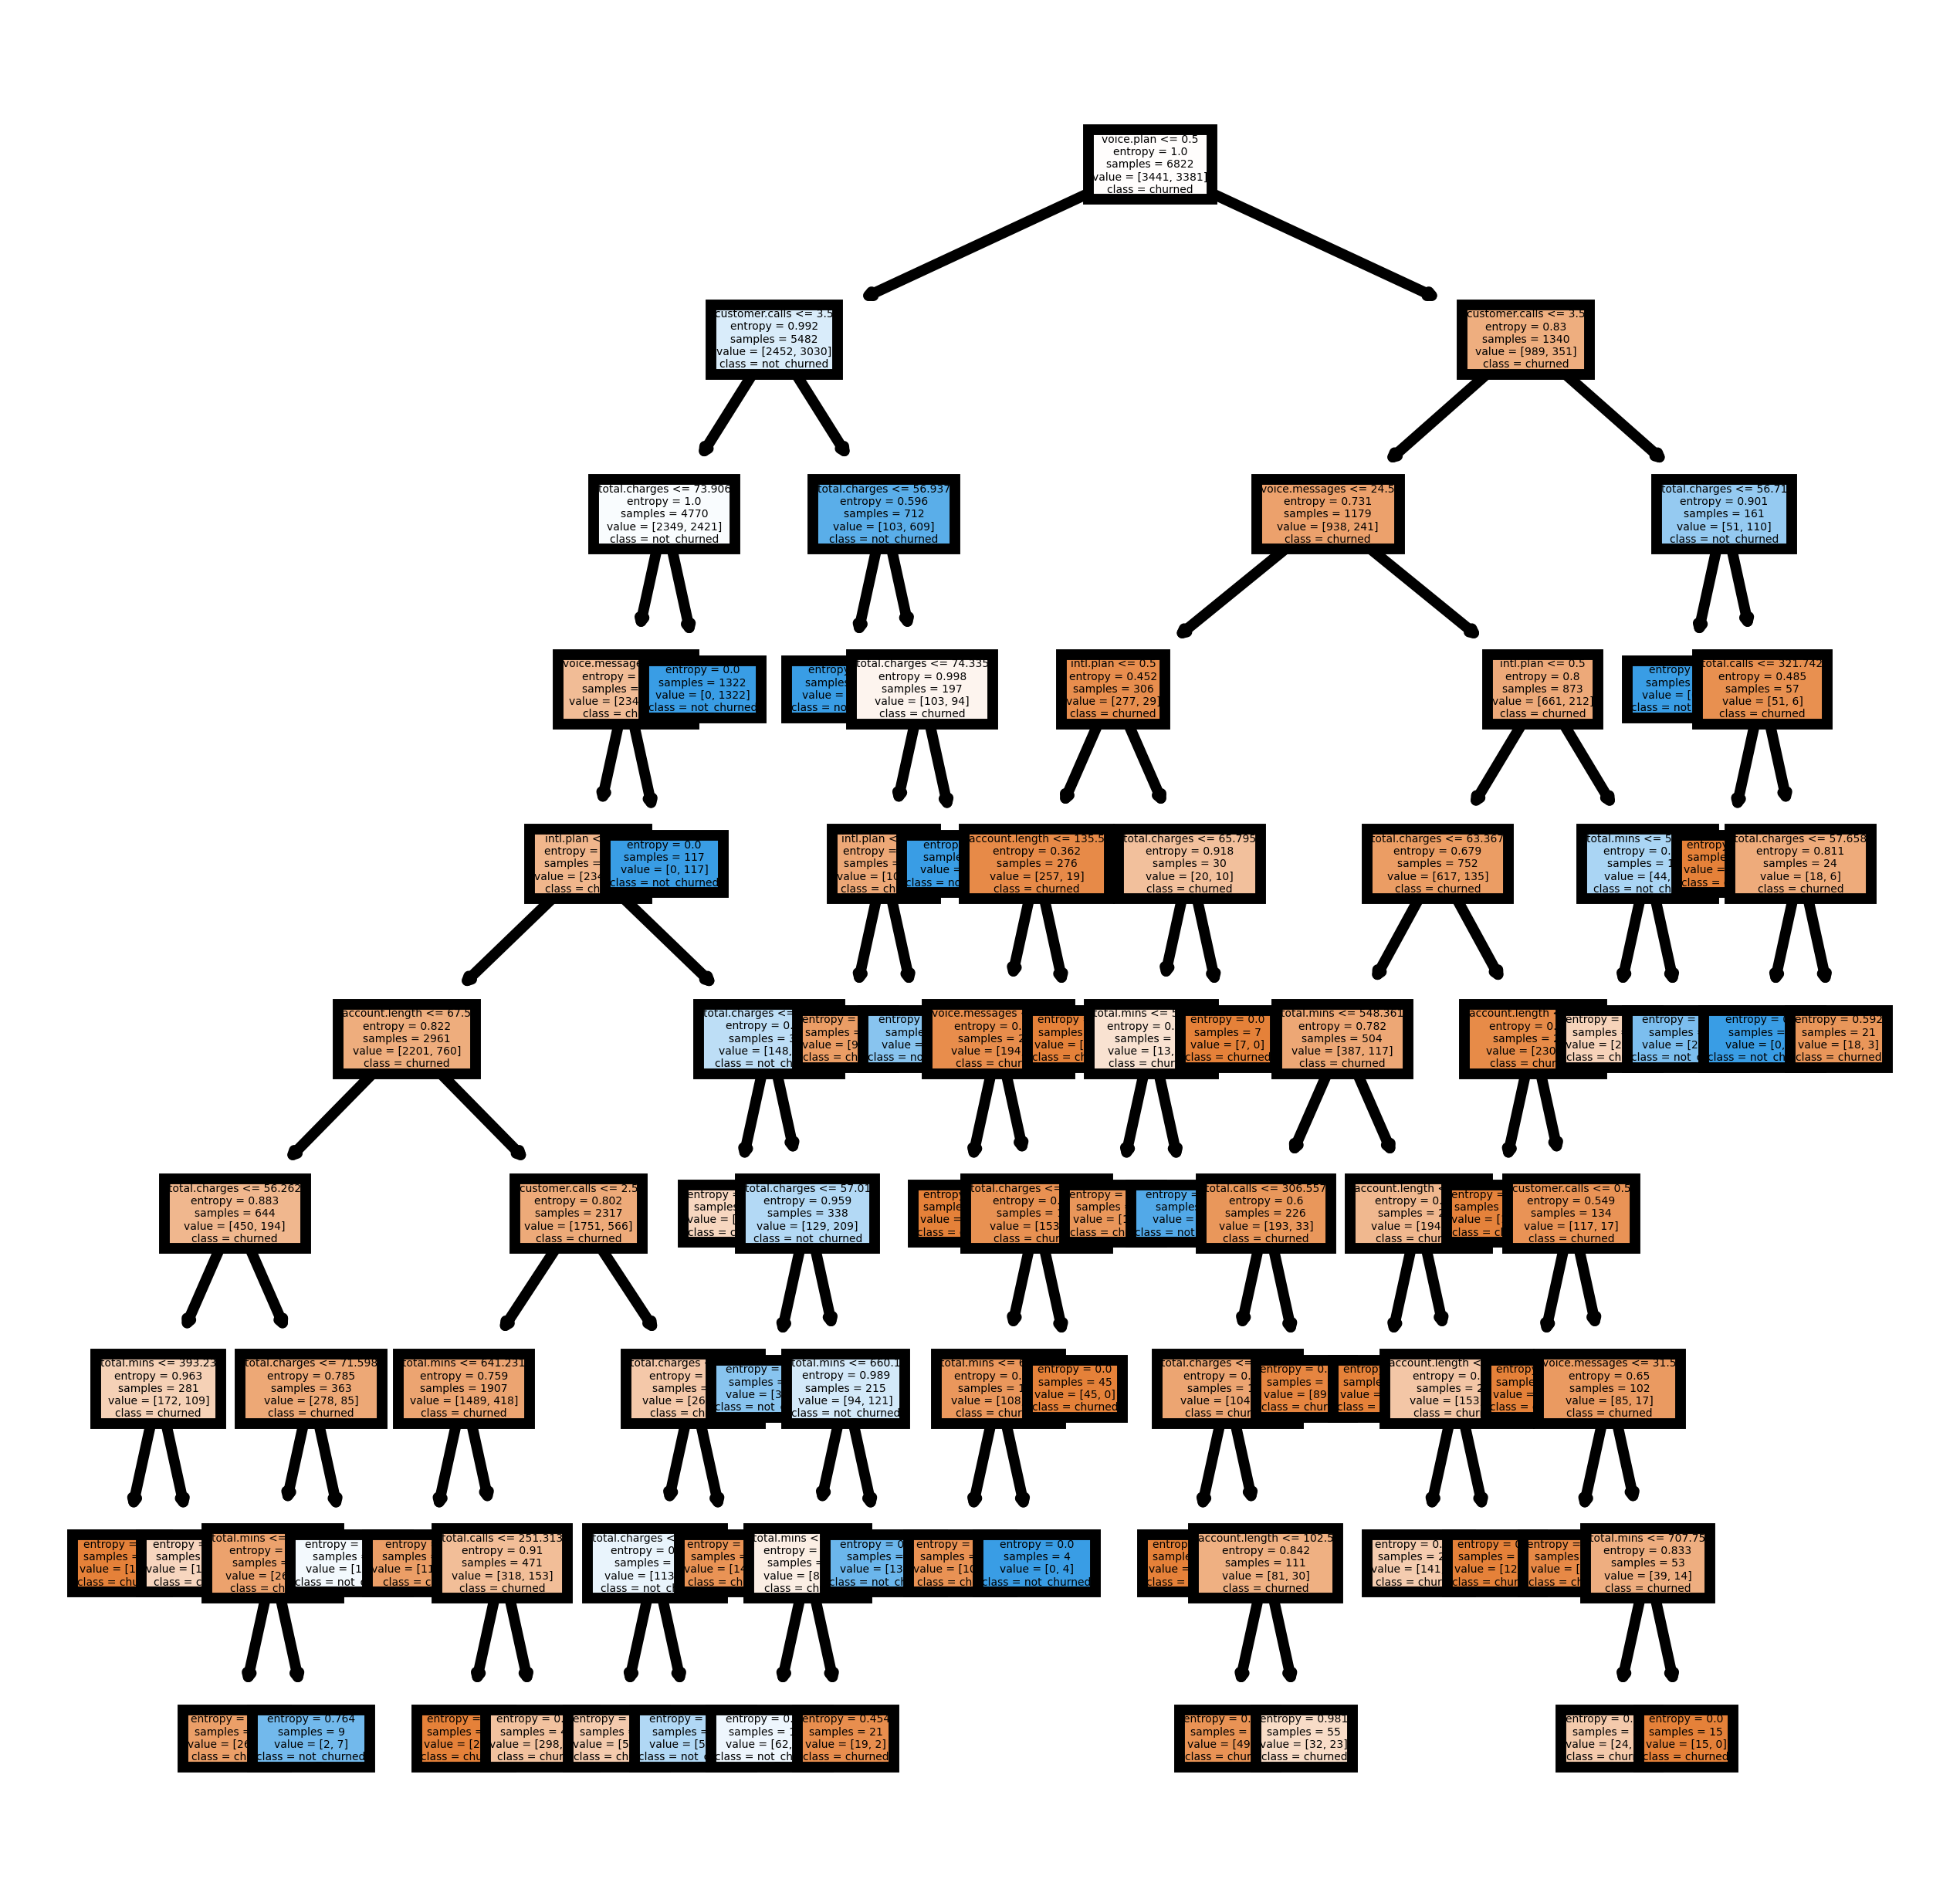

In [409]:
fn=['account.length','voice.plan','voice.messages','intl.plan','customer.calls','total.charges','total.calls','total.mins']
cn=['churned','not_churned']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=1000)
plot_tree(dt_model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [510]:
acc3 = accuracy_score(y_test,y_pred_dt)
print('Classification Report : \n',classification_report(y_test,y_pred_dt))
print('='*50)
print('Accuracy =',acc3)
print('='*50)

Classification Report : 
               precision    recall  f1-score   support

           0       0.78      0.95      0.86       861
           1       0.94      0.73      0.82       845

    accuracy                           0.84      1706
   macro avg       0.86      0.84      0.84      1706
weighted avg       0.86      0.84      0.84      1706

Accuracy = 0.8405627198124267


In [411]:
acc3 = accuracy_score(y_test,y_pred_dt)
print('Classification Report : \n',classification_report(y_test,y_pred_dt))
print('='*50)
print('Accuracy =',acc3)
print('='*50)

Classification Report : 
               precision    recall  f1-score   support

           0       0.76      0.92      0.84       823
           1       0.91      0.74      0.81       883

    accuracy                           0.83      1706
   macro avg       0.84      0.83      0.82      1706
weighted avg       0.84      0.83      0.82      1706

Accuracy = 0.8253223915592028


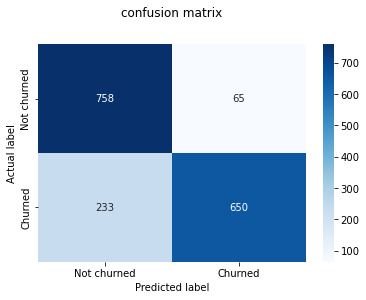

In [412]:
cm = confusion_matrix(y_test,y_pred_dt)
class_label = ["Not churned", "Churned"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='Blues')
plt.title('Confusion matrix for logistic regression ', fontsize = 20);
plt.title("confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.show()

In [413]:
dt_model.score(X_train,y_train)

0.8446203459396071

In [414]:
dt_model.score(X_test,y_test)

0.8253223915592028

<h2><center> 4.RANDOM FOREST </center></h2>

In [415]:
rfc=RandomForestClassifier(random_state=42)

In [416]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [417]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [418]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 200}

In [419]:
rfc_model = RandomForestClassifier(n_estimators = 200,max_features="log2" ,max_depth=8 ,criterion = "gini")
rfc_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, max_features='log2', n_estimators=200)

In [420]:
y_pred_rfc = rfc_model.predict(X_test)

In [421]:
acc4 = accuracy_score(y_test,y_pred_rfc)
print("Classification report : \n",classification_report(y_test,y_pred_rfc))
print("="*50)
print("Accuracy Score",acc4)
print("="*50)

Classification report : 
               precision    recall  f1-score   support

           0       0.76      0.96      0.85       823
           1       0.95      0.72      0.82       883

    accuracy                           0.84      1706
   macro avg       0.86      0.84      0.84      1706
weighted avg       0.86      0.84      0.83      1706

Accuracy Score 0.8364595545134819


Text(0.5, 14.09375, 'Predicted label')

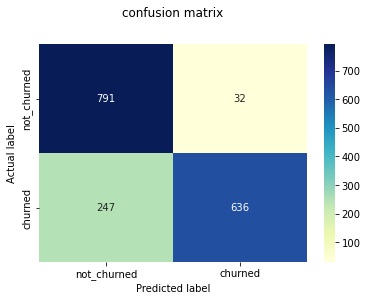

In [422]:
cm = confusion_matrix(y_test,y_pred_rfc)
class_label = ["not_churned", "churned"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='YlGnBu')
plt.title('Confusion matrix for Logistic Regression ', fontsize = 20);
plt.title("confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [423]:
rfc_model.score(X_train,y_train)

0.8651421870419231

In [424]:
rfc_model.score(X_test,y_test)

0.8364595545134819

<h2><center> 5.K-NEAREST NEIGHBOUR </center></h2>

In [511]:
KNN=KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

In [512]:
# defining parameter range
grid = GridSearchCV(KNN, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)

In [513]:
# fitting the model for grid search
grid_search=grid.fit(scaled_X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [514]:
grid_search.best_params_

{'n_neighbors': 1}

In [515]:
KNN_model = KNeighborsClassifier(n_neighbors=1)
KNN_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [516]:
y_pred_knn = KNN_model.predict(scaled_X_test)

In [517]:
acc5 = accuracy_score(y_test,y_pred_knn)
print("Classification report : \n",classification_report(y_test,y_pred_knn))
print("="*50)
print("Accuracy Score",acc4)
print("="*50)

Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.81      0.87       861
           1       0.83      0.94      0.88       845

    accuracy                           0.87      1706
   macro avg       0.88      0.87      0.87      1706
weighted avg       0.88      0.87      0.87      1706

Accuracy Score 0.8364595545134819


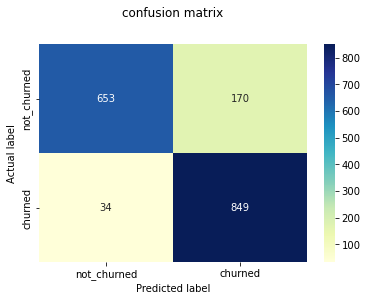

In [432]:
cm = confusion_matrix(y_test,y_pred_knn)
class_label = ["not_churned", "churned"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='YlGnBu')
plt.title('Confusion matrix for Logistic Regression ', fontsize = 20);
plt.title("confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.show()

In [433]:
KNN_model.score(X_train,y_train)

1.0

In [434]:
KNN_model.score(X_test,y_test)

0.88042203985932

<h2><center> 6.ANN MODEL </center></h2>

In [435]:
# Define the model architecture
ANN_model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(32, input_shape=(X_train.shape[1],), activation='relu'),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
ANN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
ANN_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))



# Evaluate the model on the test set
loss, acc6 = ANN_model.evaluate(X_test, y_test)

Epoch 1/100
214/214 [==============================] - 2s 4ms/step - loss: 24.6457 - accuracy: 0.5339 - val_loss: 0.7264 - val_accuracy: 0.6231
Epoch 2/100
214/214 [==============================] - 1s 2ms/step - loss: 0.7494 - accuracy: 0.5858 - val_loss: 0.7122 - val_accuracy: 0.6108
Epoch 3/100
214/214 [==============================] - 1s 2ms/step - loss: 0.6722 - accuracy: 0.6183 - val_loss: 0.6300 - val_accuracy: 0.6641
Epoch 4/100
214/214 [==============================] - 1s 3ms/step - loss: 0.6915 - accuracy: 0.6177 - val_loss: 0.6572 - val_accuracy: 0.6465
Epoch 5/100
214/214 [==============================] - 1s 3ms/step - loss: 0.6702 - accuracy: 0.6357 - val_loss: 0.5908 - val_accuracy: 0.6876
Epoch 6/100
214/214 [==============================] - 1s 3ms/step - loss: 0.7053 - accuracy: 0.6404 - val_loss: 0.6467 - val_accuracy: 0.6512
Epoch 7/100
214/214 [==============================] - 1s 2ms/step - loss: 0.6585 - accuracy: 0.6566 - val_loss: 0.6234 - val_accuracy: 0.665

Epoch 58/100
214/214 [==============================] - 1s 3ms/step - loss: 0.5658 - accuracy: 0.7265 - val_loss: 0.5090 - val_accuracy: 0.7562
Epoch 59/100
214/214 [==============================] - 0s 2ms/step - loss: 0.5626 - accuracy: 0.7187 - val_loss: 0.6170 - val_accuracy: 0.7098
Epoch 60/100
214/214 [==============================] - 0s 2ms/step - loss: 0.5471 - accuracy: 0.7348 - val_loss: 0.5304 - val_accuracy: 0.7227
Epoch 61/100
214/214 [==============================] - 1s 3ms/step - loss: 0.5518 - accuracy: 0.7252 - val_loss: 0.5343 - val_accuracy: 0.7585
Epoch 62/100
214/214 [==============================] - 1s 3ms/step - loss: 0.5677 - accuracy: 0.7205 - val_loss: 0.5728 - val_accuracy: 0.7356
Epoch 63/100
214/214 [==============================] - 1s 3ms/step - loss: 0.5550 - accuracy: 0.7306 - val_loss: 0.5183 - val_accuracy: 0.7339
Epoch 64/100
214/214 [==============================] - 1s 3ms/step - loss: 0.5616 - accuracy: 0.7202 - val_loss: 0.5950 - val_accuracy:

In [436]:
print("Test Accuracy",acc6)

Test Accuracy 0.7315357327461243


## ENSEMBLE TECHNIQUE

In [575]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
logreg_model = LogisticRegression(random_state=42)
rf_model.fit(X_train, y_train)
logreg_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [576]:
from sklearn.metrics import f1_score
rf_pred = rf_model.predict(X_test)
logreg_pred = logreg_model.predict(X_test)

rf_acc = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

logreg_acc = accuracy_score(y_test, logreg_pred)
logreg_f1 = f1_score(y_test, logreg_pred)

print("Random Forest Accuracy:", rf_acc)
print("Random Forest F1 Score:", rf_f1)
print("Logistic Regression Accuracy:", logreg_acc)
print("Logistic Regression F1 Score:", logreg_f1)

Random Forest Accuracy: 0.9120750293083235
Random Forest F1 Score: 0.9122807017543859
Logistic Regression Accuracy: 0.7080890973036342
Logistic Regression F1 Score: 0.7251655629139072


In [578]:
enemble_pred = np.round((rf_pred + logreg_pred)/2)
ensemble_acc = accuracy_score(y_test, ensemble_pred)
ensemble_f1 = f1_score(y_test, ensemble_pred)

print("Ensemble Accuracy:", ensemble_acc)
print("Ensemble F1 Score:", ensemble_f1)

Ensemble Accuracy: 0.4824150058616647
Ensemble F1 Score: 0.0


<h2><center> 1. ADA BOOST </center></h2>

In [440]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.ensemble import AdaBoostClassifier

In [441]:
seed = 10
num_trees = 30

In [442]:
kfold = KFold(n_splits=5)
ada_model = AdaBoostClassifier(n_estimators=num_trees)
ada_results = cross_val_score(ada_model,smote_X,smote_y,cv=kfold)
print(ada_results.mean())

0.7473945673885167


In [443]:
ada_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=30)

In [444]:
y_pred_ada = ada_model.predict(X_test)

In [445]:
acc10 = accuracy_score(y_test,y_pred_ada)
print("Classification report : \n",classification_report(y_test,y_pred_ada))
print("="*50)
print("Accuracy Score",acc10)
print("="*50)

Classification report : 
               precision    recall  f1-score   support

           0       0.74      0.89      0.81       823
           1       0.88      0.71      0.78       883

    accuracy                           0.80      1706
   macro avg       0.81      0.80      0.80      1706
weighted avg       0.81      0.80      0.79      1706

Accuracy Score 0.7960140679953107


<h2><center> 2. XG BOOST </center></h2>

In [446]:
from sklearn import svm
from xgboost import XGBClassifier

In [447]:
clf = XGBClassifier()

In [448]:
kfold = KFold(n_splits=5)
xg_model = XGBClassifier(n_estimators = num_trees)
xg_results = cross_val_score(xg_model,smote_X,smote_y,cv=kfold)
print(xg_results.mean())

0.8210335094697687


In [449]:
xg_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=30, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [450]:
y_pred_xg = xg_model.predict(X_test)

In [451]:
acc7 = accuracy_score(y_test,y_pred_xg)
print("Classification report : \n",classification_report(y_test,y_pred_xg))
print("="*50)
print("Accuracy Score",acc7)
print("="*50)

Classification report : 
               precision    recall  f1-score   support

           0       0.81      0.95      0.87       823
           1       0.94      0.80      0.86       883

    accuracy                           0.87      1706
   macro avg       0.88      0.87      0.87      1706
weighted avg       0.88      0.87      0.87      1706

Accuracy Score 0.8675263774912075


<h2><center> 3. Stacking </center></h2>

In [452]:
from mlxtend.classifier import StackingClassifier
from sklearn.naive_bayes import GaussianNB

In [453]:
clf1=KNeighborsClassifier(n_neighbors=1)
clf2=RandomForestClassifier(random_state=1)
clf3=GaussianNB()
lr=LogisticRegression()
sclf=StackingClassifier(classifiers=[clf1,clf2,clf3],use_probas=True,meta_classifier=lr)

In [454]:
print('3-fold cross validation:\n')

for clf,label in zip([clf1,clf2,clf3,sclf],['KNN','Random_forest','Naive_bayes','StackingClassifier']):
    scores=cross_val_score(clf,smote_X,smote_y,cv=3,scoring='f1_macro')
    print("f1 Scores:",(scores.mean(),label))

3-fold cross validation:

f1 Scores: (0.8680738525419279, 'KNN')
f1 Scores: (0.9001559617454311, 'Random_forest')
f1 Scores: (0.7174161417325444, 'Naive_bayes')
f1 Scores: (0.8680738525419279, 'StackingClassifier')


In [455]:
sclf.fit(X_train,y_train)

StackingClassifier(classifiers=[KNeighborsClassifier(n_neighbors=1),
                                RandomForestClassifier(random_state=1),
                                GaussianNB()],
                   meta_classifier=LogisticRegression(), use_probas=True)

In [456]:
y_pred_stc = sclf.predict(X_test)

In [457]:
acc8 = accuracy_score(y_test,y_pred_stc)
print("Classification report : \n",classification_report(y_test,y_pred_stc))
print("="*50)
print("Accuracy Score",acc8)
print("="*50)

Classification report : 
               precision    recall  f1-score   support

           0       0.95      0.79      0.86       823
           1       0.83      0.96      0.89       883

    accuracy                           0.88      1706
   macro avg       0.89      0.88      0.88      1706
weighted avg       0.89      0.88      0.88      1706

Accuracy Score 0.88042203985932


<h2><center> 4. BAGGING </center></h2>

In [458]:
from sklearn.ensemble import BaggingClassifier

In [559]:
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=50,max_features=5,random_state=42)

In [560]:
bagg_scores = bagging_clf.fit(scaled_X_train,y_train).score(scaled_X_test,y_test)
bagg_scores

0.906799531066823

In [561]:
y_pred_Bagg = bagging_clf.predict(scaled_X_test)

In [564]:
acc9 = accuracy_score(y_test,y_pred_Bagg)
print("Classification report : \n",classification_report(y_test,y_pred_Bagg))
print("="*50)
print("Accuracy Score",acc9)
print("="*50)

Classification report : 
               precision    recall  f1-score   support

           0       0.86      0.96      0.91       823
           1       0.95      0.86      0.91       883

    accuracy                           0.91      1706
   macro avg       0.91      0.91      0.91      1706
weighted avg       0.91      0.91      0.91      1706

Accuracy Score 0.906799531066823


### Finding the best model

In [565]:
    data = {"MODEL":pd.Series(["Logistic Regression","Support Vector Machine","Decision Tree","Random Forest","KNN","ANN","Ensemble","Ada Boost","XG Boost","Satcking","Bagging"]),"Accuracy":pd.Series([acc1,acc2,acc3,acc4,acc5,acc6,ensemble_acc,acc10,acc7,acc8,acc9])}
Accuracy_table=pd.DataFrame(data)
Accuracy_table.sort_values(by='Accuracy')

,MODEL,Accuracy
6,Ensemble,0.482415
1,Support Vector Machine,0.720399
0,Logistic Regression,0.725088
5,ANN,0.731536
7,Ada Boost,0.796014
3,Random Forest,0.836460
2,Decision Tree,0.840563
8,XG Boost,0.867526
4,KNN,0.872802
9,Satcking,0.880422


In [335]:
    data = {"MODEL":pd.Series(["Logistic Regression","Support Vector Machine","Decision Tree","Random Forest","KNN","ANN","Ensemble","Ada Boost","XG Boost","Satcking","Bagging"]),"Accuracy":pd.Series([acc1,acc2,acc3,acc4,acc5,acc6,ensemble_acc,acc10,acc7,acc8,acc9])}
Accuracy_table=pd.DataFrame(data)
Accuracy_table.sort_values(by='Accuracy')

,MODEL,Accuracy
0,Logistic Regression,0.789566
6,Ensemble,0.869285
5,ANN,0.879250
7,Ada Boost,0.879250
2,Decision Tree,0.900938
3,Random Forest,0.910903
4,KNN,0.931419
9,Satcking,0.931419
8,XG Boost,0.934349
1,Support Vector Machine,0.941383


In [635]:
import pickle

In [637]:
file_name ="Svm_model.pkl"
with open (file_name,"wb") as file:
    pickle.dump(svc_model,file)